# <center><span style='color:limegreen'>**Simple linear Regression**</span></center>

## Step 1
### <span style='background:aqua'>Importing Data and Visualizing it</span>

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [97]:
# read the data
advdata = pd.read_csv("advertising.csv")

In [98]:
advdata.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [99]:
advdata.shape

(200, 4)

In [100]:
advdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [101]:
advdata.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


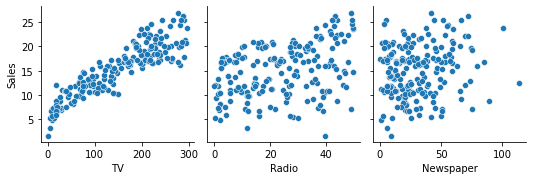

In [102]:
# visualize the dataset
sns.pairplot(data = advdata,
             x_vars = ["TV", "Radio", "Newspaper"],
            y_vars = "Sales")
plt.show()

In [103]:
# correlation between variables(target and predictor)
advdata.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


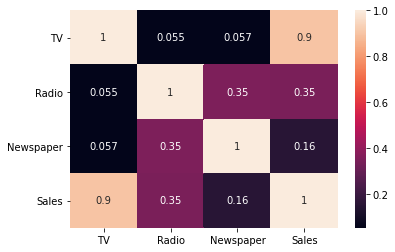

In [104]:
sns.heatmap(advdata.corr(), annot = True)
plt.show()

&emsp;&emsp;&ensp; **`TV` has the strongest correlation with Sales**

## Step 2: Performing Simple Linear Regression


- Here we will take one predictor variable to build our model*
- In here the equation will be
- $y = c + m_1 \times TV$

- m1 is called model **coefficient** or **model parameter**

## Steps:
- Create X and y
- Split Train and Test set(70-30, 80-20)
- Train model on the Trainig set(i.e learn the coefficient)
- Evaluate the model built

In [105]:
# Create X and y
X = advdata["TV"]
y = advdata["Sales"]

In [106]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=80)

In [107]:
X_train_sm = sm.add_constant(X_train)

In [108]:
X_train_sm.head()

,const,TV
179,1.0,165.6
71,1.0,109.8
66,1.0,31.5
125,1.0,87.2
83,1.0,68.4


In [109]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [110]:
lr_model.params

const    6.835104
TV       0.056724
dtype: float64

In [111]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     662.9
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           1.51e-54
Time:                        11:27:56   Log-Likelihood:                -307.81
No. Observations:                 140   AIC:                             619.6
Df Residuals:                     138   BIC:                             625.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8351      0.366     18.696      0.000       6.112       7.558
TV             0.0567      0.002     25.746      0.000       0.052       0.061
==============================================================================
Omnibus:                        0.023   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.988   Jarque-Bera (JB):                0.027
Skew:                           0.017   Prob(JB):                        0.987
Kurtosis:                       2.941   Cond. No.                         327.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- coeffecient and p-value
- R-squared is 82.8 % which is very high and good suugest that 82 % variance can be explained by the TV
- p(F-statistics) is very low which means the fit is not by chance

In [112]:
y_train_pred = lr_model.predict(X_train_sm)

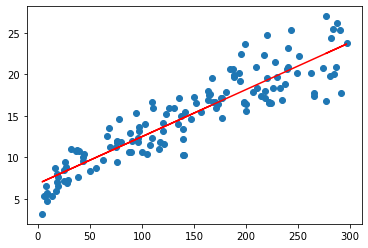

In [113]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

## Step 3: Residual analysis

In [114]:
res = y_train -  y_train_pred

Text(0.5, 1.0, 'Residual Plot')

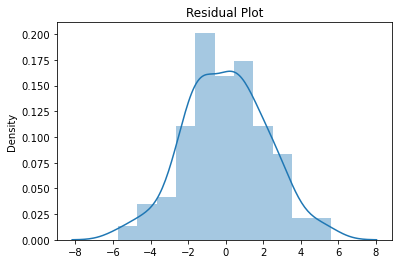

In [115]:
# Assumption error terms should be normally distributed
# Plot the residual
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

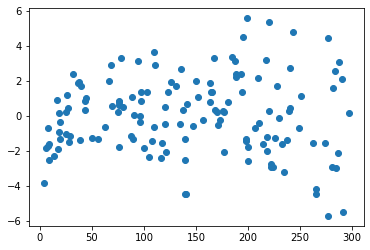

In [116]:
# Error Terms should be independent of each other
plt.scatter(X_train, res)
plt.show()

- the variance on right side is high but this much can work as it is not at all places and too high 
- assumption variance in error terms should be 0
- error terms are blue dot and x axis 0 is basis to check variance

# Step 4 : Prediction and Evaluation of model on the test set

In [117]:
# make prediction on the test set
# calculate r2 score, mean square error on test set

In [118]:
# add constant to X_test
X_test_sm = sm.add_constant(X_test)

# make prediction (y_test_pred)
y_test_pred = lr_model.predict(X_test_sm)

In [119]:
# Calculating r2 score for test set
r2 = r2_score(y_test, y_test_pred)
r2

0.7729524298527952

In [120]:
r21 = r2_score(y_train, y_train_pred)
r21

0.8276843033392332

In [121]:
mean_squared_error(y_test, y_test_pred)

6.341110676610105

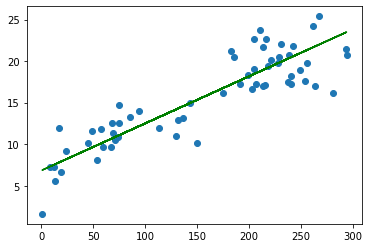

In [122]:
# visualize on test set the model
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'g')
plt.show()

## Linear Regression Using `sklearn`

In [123]:
# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=80)

In [124]:
# create instance of linear Regression
lm = LinearRegression()

# reshape X_train and X_test
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

# fit the model
lm.fit(X_train_lm, y_train)

LinearRegression()

In [128]:
# make prediction , see params
print(lm.coef_)
print(lm.intercept_)

[0.0567241]
6.835103757137057


In [129]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [132]:
# evaluate(r2, etc)
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.8276843033392332
0.7729524298527953
